### Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import imageio

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from math import sqrt

### Reading Data Set

In [4]:
data = pd.read_csv('data.csv', on_bad_lines = "skip")
print(data.shape)
data.head()

(669640, 2)


,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


### Pre-Processing

In [5]:
# Removing missing values
data.dropna(inplace = True)

#Checking to see if there are any null lines after the removal
data.isnull().sum()

password    0
strength    0
dtype: int64

In [6]:
data.count()

password    669639
strength    669639
dtype: int64

strength
2     83137
0     89701
1    496801
Name: count, dtype: int64


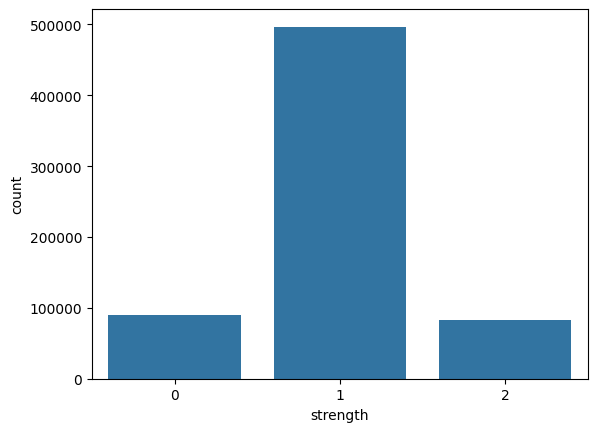

In [7]:
print(data.strength.value_counts().sort_values(ascending = True))
ax = sns.countplot(x="strength", data=data)

In [8]:
# Creating Tuples
pw_tuple = np.array(data)
pw_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [9]:
# Shuffling the Data
random.shuffle(pw_tuple)
x = [labels[0] for labels in pw_tuple]
y = [labels[1] for labels in pw_tuple]

In [10]:
# Creating Tokenizer Function
def tokenizer(password):
    character = [] # array that will hold every character of the password
    for i in password:
        character.append(i)
    return character

# Checking that the Function works
tokenizer('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [11]:
# Vectorizer for ML Algorithms
vectorizer = tf(tokenizer = tokenizer) # Term Frequency Inverse Document Frequency (TF-IDF)
x = vectorizer.fit_transform(x)

c:\Users\andyd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
print(len(vectorizer.vocabulary_))
vectorizer.vocabulary_

129


{'k': 61,
 'z': 76,
 'd': 54,
 'e': 55,
 '5': 34,
 '7': 36,
 'i': 59,
 'n': 64,
 'o': 65,
 '3': 32,
 '4': 33,
 'v': 72,
 's': 69,
 '1': 30,
 'y': 75,
 'r': 68,
 'm': 63,
 'g': 57,
 '2': 31,
 'u': 71,
 '6': 35,
 'c': 53,
 '8': 37,
 'h': 58,
 'w': 73,
 'a': 51,
 '9': 38,
 '0': 29,
 't': 70,
 'f': 56,
 'l': 62,
 '@': 44,
 'j': 60,
 '-': 26,
 'q': 67,
 'p': 66,
 'b': 52,
 '>': 42,
 'x': 74,
 '!': 16,
 '.': 27,
 '&': 21,
 '?': 43,
 '<': 40,
 '_': 49,
 ';': 39,
 '"': 17,
 '~': 80,
 '+': 25,
 '^': 48,
 '/': 28,
 '$': 19,
 ')': 23,
 '%': 20,
 '(': 22,
 '±': 90,
 ' ': 15,
 '#': 18,
 '*': 24,
 '[': 45,
 ']': 47,
 'þ': 126,
 'ó': 117,
 '\\': 46,
 '=': 41,
 '{': 77,
 '\x1c': 13,
 '}': 79,
 'ô': 118,
 '³': 92,
 '\x05': 2,
 '\x1b': 12,
 '\x19': 11,
 'ú': 122,
 '`': 50,
 '¿': 100,
 'à': 103,
 '\x16': 9,
 'ò': 116,
 '·': 95,
 '\x1e': 14,
 'ß': 102,
 'ä': 106,
 '´': 93,
 'ð': 114,
 '°': 89,
 '\x08': 4,
 'ê': 111,
 'á': 104,
 '\x7f': 81,
 '|': 78,
 'å': 107,
 '‚': 128,
 'º': 96,
 '¡': 84,
 '\x10': 6,
 '

In [13]:
l = list()
ind = list()
for i in x[:1000]:
    ind.append(i.indices)
    l.append(i.data.prod())
# print(l, '\n')
print(ind)

[array([36, 34, 55, 54, 76, 61]), array([33, 32, 65, 64, 59, 61]), array([33, 32, 65, 64, 59, 61]), array([68, 75, 30, 69, 72, 59, 36, 61]), array([31, 57, 63, 75, 30, 32, 55, 76]), array([68, 75, 30, 69, 72, 59, 36, 61]), array([36, 34, 55, 54, 76, 61]), array([73, 58, 37, 53, 35, 71, 72, 65]), array([73, 58, 37, 53, 35, 71, 72, 65]), array([31, 57, 63, 75, 30, 32, 55, 76]), array([73, 58, 37, 53, 35, 71, 72, 65]), array([38, 51, 35, 31, 30, 69, 32, 34]), array([70, 29, 37, 35, 31, 30, 32, 65, 34, 61]), array([38, 51, 71, 75, 69, 72, 65, 34]), array([68, 75, 30, 69, 72, 59, 36, 61]), array([31, 57, 63, 75, 30, 32, 55, 76]), array([37, 30, 72, 33, 36]), array([70, 29, 37, 35, 31, 30, 32, 65, 34, 61]), array([73, 58, 37, 53, 35, 71, 72, 65]), array([56, 35, 32, 65, 59, 36, 54]), array([26, 60, 44, 62, 70, 51, 53, 75, 30, 69, 64, 59, 34, 55]), array([66, 67, 70, 29, 38, 73, 71, 65, 64, 59, 36, 55, 76, 61]), array([38, 51, 71, 75, 69, 72, 65, 34]), array([60, 38, 58, 53, 71, 31, 65, 36, 5

In [14]:
print(x[0]) # kzde5577
# password has 8 characters, but 5 and 7 are repeated. 
# Hence this is why we see only 6 unique characters for x[0] (kzde5577)

  (0, 36)	0.5913139162095766
  (0, 34)	0.5669346995268073
  (0, 55)	0.22090446062287425
  (0, 54)	0.28593603394580036
  (0, 76)	0.3362140816630754
  (0, 61)	0.29212119750038734


In [15]:
df = pd.DataFrame(x[0].T.todense(), index = vectorizer.get_feature_names_out(), columns=['TF-IDF'])
df.sort_values(by = ['TF-IDF'], ascending=False)

,TF-IDF
7,0.591314
5,0.566935
z,0.336214
k,0.292121
d,0.285936
...,...
9,0.000000
8,0.000000
6,0.000000
4,0.000000


In [16]:
df1 = pd.DataFrame(x[1].T.todense(), index = vectorizer.get_feature_names_out(), columns=['TF-IDF'])
df1.sort_values(by = ['TF-IDF'], ascending=False)

,TF-IDF
4,0.617332
3,0.560414
k,0.321874
n,0.267880
o,0.256471
...,...
9,0.000000
8,0.000000
7,0.000000
6,0.000000


In [17]:
# Split the data: 70% train and 30 % test
# Text Vectorization layer in order to be a padded sequence ??
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30)
print(xtrain)
print('X Train: ', xtrain.shape)
print('X Test: ', xtest.shape)

  (0, 67)	0.3787182938116179
  (0, 58)	0.3220601170057053
  (0, 37)	0.30467684922138666
  (0, 71)	0.288037436319974
  (0, 65)	0.24629211086864738
  (0, 64)	0.257248444050358
  (0, 59)	0.24236767142237786
  (0, 36)	0.6256816553170342
  (1, 26)	0.8610254924414129
  (1, 70)	0.15598589224604376
  (1, 51)	0.11029638265204642
  (1, 57)	0.17542362732612218
  (1, 68)	0.14614265284418526
  (1, 64)	0.14200625537063952
  (1, 55)	0.387093412745709
  (2, 70)	0.35288326863628067
  (2, 51)	0.49904190011772387
  (2, 58)	0.40219568902109953
  (2, 31)	0.30005312745195295
  (2, 30)	0.2586428893581639
  (2, 32)	0.3360405666643253
  (2, 64)	0.32125746014867984
  (2, 59)	0.30267402716752995
  (3, 66)	0.5158370416585247
  (3, 60)	0.2710757824627407
  :	:
  (468744, 31)	0.3036901637701112
  (468744, 75)	0.3902984729311264
  (468744, 30)	0.2617779794337694
  (468744, 32)	0.34011381781058553
  (468744, 65)	0.31130316330405305
  (468744, 64)	0.3251515207104286
  (468745, 74)	0.6654044423039005
  (468745, 67)	0.2

### Decision Tree Classifier

In [18]:
dtr = DecisionTreeClassifier(random_state = 42)

# Training
dtr.fit(xtrain, ytrain)

# Testing
dtr_pred = dtr.predict(xtest)
dtr_pred

array([1, 1, 1, ..., 0, 1, 1])

In [19]:
dtr_cr = classification_report(ytest, dtr_pred)
dtr_rmse = sqrt(mean_squared_error(ytest, dtr_pred))
print(dtr_cr)
print("Root Mean Squared Error: ", dtr_rmse)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     26970
           1       0.98      0.98      0.98    149165
           2       0.95      0.94      0.95     24757

    accuracy                           0.97    200892
   macro avg       0.95      0.95      0.95    200892
weighted avg       0.97      0.97      0.97    200892

Root Mean Squared Error:  0.18845847283133924


<Axes: >

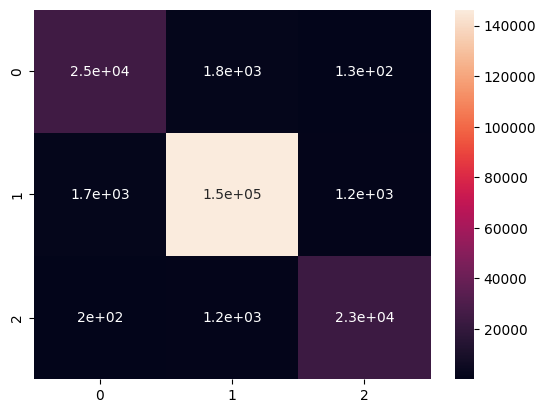

In [20]:
dtr_cm = confusion_matrix(ytest, dtr_pred)
sns.heatmap(dtr_cm, annot = True)

### Classifying a User Input

In [25]:
pw_array = np.array([input("Type a password to check its strength:")])
vectorized_pw = vectorizer.transform(pw_array)
user_pred = dtr.predict(vectorized_pw)

for item in user_pred:
    if item == 0:
        print(user_pred, f"Password:{pw_array} is Weak")
    elif item == 1:
        print(user_pred, f"Password:{pw_array} is Medium")
    elif item == 2:
        print(user_pred, f"Password:{pw_array} is Strong")
    else:
        print("Error")

[1] Password:['engin33r'] is Medium
